In [ ]:
!pip install -q wordcloud emoji

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import emoji
from wordcloud import WordCloud, STOPWORDS
import re
import nltk
from nltk.corpus import stopwords #corpora
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df=pd.read_csv("Tesla.csv")
df.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,1546541426317590528,1545826164564000768,1.657559e+12,2022-07-11 17:06:24,0,NaN,@GailAlfarATX @elonmusk @Tesla @teslacn @Tesla...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'GailAlfarATX', 'name': 'Gail...",NaN,NaN,NaN,NaN
1,1,1546541415857102850,1545826164564000768,1.657559e+12,2022-07-11 17:06:21,0,NaN,@elonmusk @GailAlfarATX @Tesla @teslacn @Tesla...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'elonmusk', 'name': 'Elon Mus...",NaN,NaN,NaN,NaN
2,2,1546541411897581568,1546541411897581568,1.657559e+12,2022-07-11 17:06:20,0,NaN,"@elonmusk #Think about buying a country , #Mex...",en,"['think', 'mexico', 'constitution']",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,3,1546541379110805508,1546340000500813824,1.657559e+12,2022-07-11 17:06:12,0,NaN,"@get_innocuous Actual receipts, and yet you ha...",en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'get_innocuous', 'name': 'tra...",NaN,NaN,NaN,NaN
4,4,1546541363470028800,1546541363470028800,1.657559e+12,2022-07-11 17:06:09,0,NaN,Tesla wall battery for the save! Power went ou...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
df=df[['created_at','tweet']]
df.head()

,created_at,tweet
0,1.657559e+12,@GailAlfarATX @elonmusk @Tesla @teslacn @Tesla...
1,1.657559e+12,@elonmusk @GailAlfarATX @Tesla @teslacn @Tesla...
2,1.657559e+12,"@elonmusk #Think about buying a country , #Mex..."
3,1.657559e+12,"@get_innocuous Actual receipts, and yet you ha..."
4,1.657559e+12,Tesla wall battery for the save! Power went ou...


In [ ]:
df.shape

(10016, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10016 entries, 0 to 10015
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  10016 non-null  float64
 1   tweet       10016 non-null  object 
dtypes: float64(1), object(1)
memory usage: 156.6+ KB


In [ ]:
df.isna().sum()

,0
created_at,0
tweet,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
# i don't have car
# i do not have car


contractions = {"ain't": "am not", "aren't": "are not", "can't": "cannot",
"can't've": "cannot have", "'cause": "because", "could've": "could have",
"couldn't": "could not", "couldn't've": "could not have", "didn't": "did not",
"doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have",
"hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'd've": "he would have",
"he'll": "he will", "he's": "he is", "how'd": "how did", "how'll": "how will",
"how's": "how is", "i'd": "i would", "i'll": "i will", "i'm": "i am", "i've": "i have",
"isn't": "is not", "it'd": "it would", "it'll": "it will", "it's": "it is",
"let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have",
"mightn't": "might not", "must've": "must have", "mustn't": "must not",
"needn't": "need not", "oughtn't": "ought not", "shan't": "shall not",
"sha'n't": "shall not", "she'd": "she would", "she'll": "she will", "she's": "she is",
"should've": "should have", "shouldn't": "should not", "that'd": "that would",
"that's": "that is", "there'd": "there had", "there's": "there is", "they'd": "they would",
"they'll": "they will", "they're": "they are", "they've": "they have", "wasn't": "was not",
"we'd": "we would", "we'll": "we will", "we're": "we are", "we've": "we have",
"weren't": "were not", "what'll": "what will", "what're": "what are", "what's": "what is",
"what've": "what have", "where'd": "where did", "where's": "where is", "who'll": "who will",
"who's": "who is", "won't": "will not", "wouldn't": "would not", "you'd": "you would",
"you'll": "you will", "you're": "you are", "wfh": "work from home", "wfo": "work from office",
"idk": "i do not know", "brb": "be right back", "btw": "by the way", "tbh": "to be honest",
"omw": "on my way", "lmk": "let me know", "fyi": "for your information",
"imo": "in my opinion", "smh": "shaking my head", "nvm": "never mind",
"ikr": "i know right", "fr": "for real", "rn": "right now", "gg": "good game",
"dm": "direct message", "afaik": "as far as i know", "bff": "best friends forever",
"ftw": "for the win", "hmu": "hit me up", "ggwp": "good game well played"}


# Text data Cleaning

In [ ]:
text= "I don't have a supercar! 😎 Visit https://cars.com now!"

## Step 1: Lowercase the text


In [ ]:
text = text.lower()
text

"i don't have a supercar! 😎 visit https://cars.com now!"

## Step 2: Handle contractions


In [ ]:
text = text.split()
text


['i',
 "don't",
 'have',
 'a',
 'supercar!',
 '😎',
 'visit',
 'https://cars.com',
 'now!']

In [ ]:
new_text = []
for word in text:
    if word in contractions:
        new_text.append(contractions[word])
    else:
        new_text.append(word)

new_text

['i',
 'do not',
 'have',
 'a',
 'supercar!',
 '😎',
 'visit',
 'https://cars.com',
 'now!']

In [ ]:
text = " ".join(new_text)
text

'i do not have a supercar! 😎 visit https://cars.com now!'

## Step 3: Remove URLs

In [ ]:
text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
text

'i do not have a supercar! 😎 visit '

## Step 4: Remove usernames (e.g., @user)

In [ ]:
text = re.sub(r'@[A-Za-z0-9]+', '', text)
text

'i do not have a supercar! 😎 visit '

## Step 5: Remove HTML and symbols

In [ ]:
text = re.sub(r'\<a href', ' ', text)
text = re.sub(r'&amp;', '', text)
text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
text = re.sub(r'<br />', ' ', text)
text = re.sub(r'\'', ' ', text)

##  Step 6: Remove emojis

In [ ]:
emoji_pattern = re.compile("[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF" \
                               "\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF" \
                               "\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF" \
                               "\U00002702-\U000027B0\U000024C2-\U0001F251]+", flags=re.UNICODE)
text = emoji_pattern.sub(r'', text)
text

'i do not have a supercar   visit '

## Step 7: Tokenization


In [ ]:
words = word_tokenize(text)
words

['i', 'do', 'not', 'have', 'a', 'supercar', 'visit']

##  Step 8: Remove stopwords

In [ ]:
stop_words = set(stopwords.words("english"))
words = [word for word in words if word not in stop_words]
words

['supercar', 'visit']

## Step 9: Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(word) for word in words]
words

['supercar', 'visit']

# Text data cleaning function

In [ ]:
def clean_text(text, remove_stopwords=True):
    text = text.lower()
    if True:
        #text= "i dont't have supercar"
        text = text.split()
        # ['i','don't','have','supercar']
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
                # ['i','do not','have','supercar']
            else:
                new_text.append(word)
        text = " ".join(new_text)
        #[i do not have supercar]

    # Remove URLs
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

    # Remove usernames
    text = re.sub(r'@[A-Za-z0-9]+', '', text)

    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    # Remove emojis
    emoji_pattern = re.compile("[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF" \
                               "\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF" \
                               "\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF" \
                               "\U00002702-\U000027B0\U000024C2-\U0001F251]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Tokenize text
    words = word_tokenize(text)

    # Remove stopwords if needed
    if remove_stopwords:
        stop_words = set(stopwords.words("english"))
        words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return " ".join(words)

In [ ]:
df['clean_tweet'] = df['tweet'].apply(lambda x:clean_text(x))
df.head()

,created_at,tweet,clean_tweet
0,1.657559e+12,@GailAlfarATX @elonmusk @Tesla @teslacn @Tesla...,six 4 still live home homeschooled taught self...
1,1.657559e+12,@elonmusk @GailAlfarATX @Tesla @teslacn @Tesla...,go dozen kids… missing 3 go
2,1.657559e+12,"@elonmusk #Think about buying a country , #Mex...",think buying country mexico could turn richest...
3,1.657559e+12,"@get_innocuous Actual receipts, and yet you ha...",innocuous actual receipt yet ’ asked anyone bu...
4,1.657559e+12,Tesla wall battery for the save! Power went ou...,tesla wall battery save power went still run a...


In [ ]:
from datetime import datetime
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')
df.head()

,created_at,tweet,clean_tweet
0,2022-07-11 17:06:24,@GailAlfarATX @elonmusk @Tesla @teslacn @Tesla...,six 4 still live home homeschooled taught self...
1,2022-07-11 17:06:21,@elonmusk @GailAlfarATX @Tesla @teslacn @Tesla...,go dozen kids… missing 3 go
2,2022-07-11 17:06:20,"@elonmusk #Think about buying a country , #Mex...",think buying country mexico could turn richest...
3,2022-07-11 17:06:12,"@get_innocuous Actual receipts, and yet you ha...",innocuous actual receipt yet ’ asked anyone bu...
4,2022-07-11 17:06:09,Tesla wall battery for the save! Power went ou...,tesla wall battery save power went still run a...


# Exploratory Data Analysis

In [ ]:
df["Tweets_length"]= df["clean_tweet"].str.len()

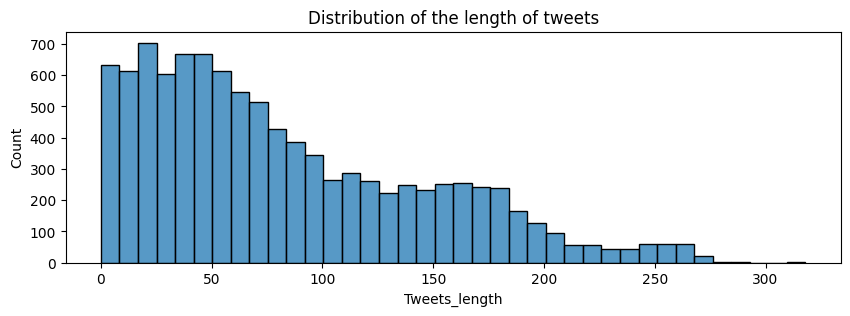

In [ ]:
plt.figure(figsize=(10,3))
sns.histplot(df['Tweets_length'])
plt.title("Distribution of the length of tweets")
plt.show()

## Wordcloud

In [ ]:
all_text = ' '.join(df['clean_tweet'])

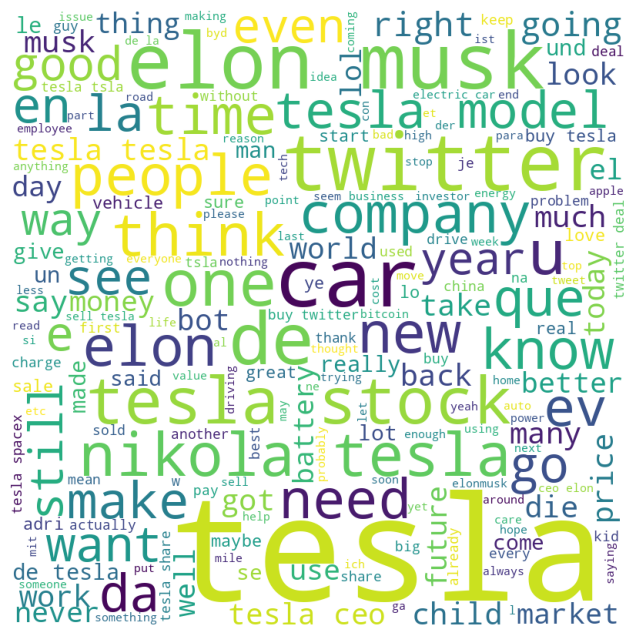

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(all_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Most popular hashtags

In [ ]:
all_hashtags = sum(
    df['tweet'].apply(lambda x: re.findall(r"#(\w+)", x.lower())),
    []
)
all_hashtags

['think',
 'mexico',
 'constitution',
 'think',
 'mexico',
 'constitution',
 'think',
 'mexico',
 'constitution',
 'think',
 'mexico',
 'constitution',
 'twitter',
 'elonmusk',
 'tesla',
 'think',
 'mexico',
 'constitution',
 'think',
 'mexico',
 'constitution',
 'think',
 'mexico',
 'constitution',
 'think',
 'mexico',
 'constitution',
 'twtr',
 'nasdaq',
 'elonmusk',
 'tesla',
 'think',
 'mexico',
 'constitution',
 'think',
 'mexico',
 'constitution',
 'think',
 'mexico',
 'constitution',
 'byd',
 'teslaroadster',
 'tesla',
 'ev',
 'electricvehicle',
 'ev',
 'electricvehicle',
 'ev',
 'tesla',
 'gigaberlin',
 'solar',
 'tesla',
 'ev',
 'climatechange',
 'renewables',
 'renewableenergy',
 'flowtrade',
 'tsla',
 'tesla',
 'blocktrades',
 'algo',
 'supportandresistance',
 'technicalanalysis',
 'trading',
 'daytrading',
 'daytrader',
 'law',
 'netde',
 'lawyers',
 'lawtwitter',
 'oekraine',
 'china',
 'tesla',
 'automotive',
 'think',
 'mexico',
 'constitution',
 'mondayvibes',
 'lunchwi

In [ ]:
# Frequency distribution
freq_dist = nltk.FreqDist(all_hashtags)
freq_dist

FreqDist({'tesla': 721, 'elonmusk': 183, 'twitter': 145, 'ev': 56, 'tsla': 42, 'spacex': 41, 'model3': 40, 'electricvehicles': 37, 'musk': 37, 'renewables': 32, ...})

In [ ]:
# Convert to DataFrame
df_hashtags = pd.DataFrame(freq_dist.items(), columns=['Hashtag', 'Count'])
df_hashtags.head()

,Hashtag,Count
0,think,12
1,mexico,14
2,constitution,13
3,twitter,145
4,elonmusk,183


In [ ]:
# Top 10 hashtags
top_10 = df_hashtags.nlargest(10, 'Count')

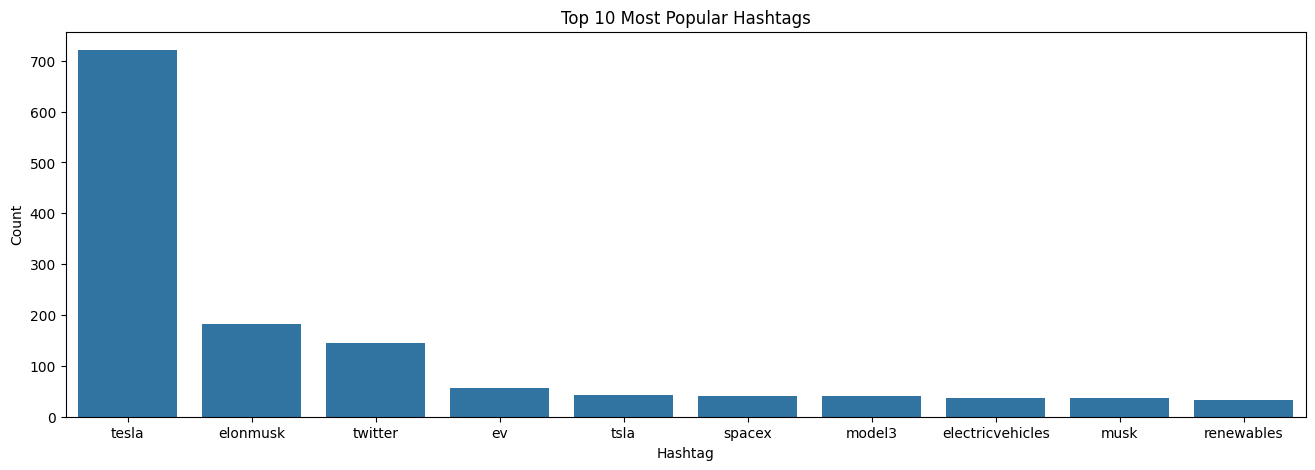

In [ ]:
# Plot
plt.figure(figsize=(16, 5))
sns.barplot(data=top_10, x='Hashtag', y='Count')
plt.title("Top 10 Most Popular Hashtags")
plt.ylabel("Count")
plt.show()

## N Gram Analysis

In [ ]:
from nltk import ngrams
from collections import Counter

In [ ]:
# Compute bigram frequencies
bigrams = list(ngrams(all_text.lower().split(), 2))
bigram_freq = Counter(bigrams)

In [ ]:
# Create and plot top N bigrams
top_N = 20
top_bigrams = bigram_freq.most_common(top_N)
bigram_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])

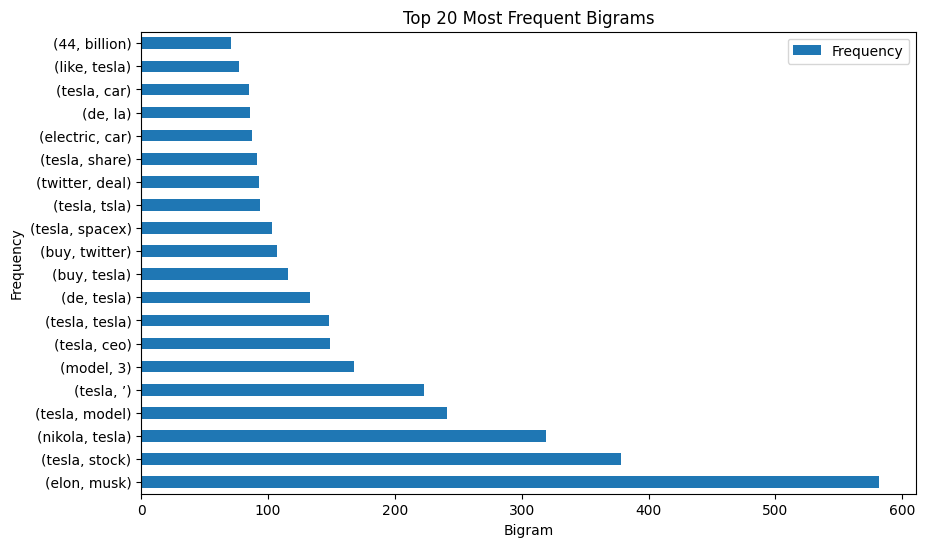

In [ ]:
bigram_df.plot(x='Bigram', y='Frequency', kind='barh', figsize=(10, 6))
plt.title(f'Top {top_N} Most Frequent Bigrams')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Compute trigram frequencies
trigrams = list(ngrams(all_text.lower().split(), 3))
trigram_freq = Counter(trigrams)

In [ ]:
# Create and plot top N trigrams
top_N = 20
top_trigrams = trigram_freq.most_common(top_N)
trigram_df = pd.DataFrame(top_trigrams, columns=['trigram', 'Frequency'])

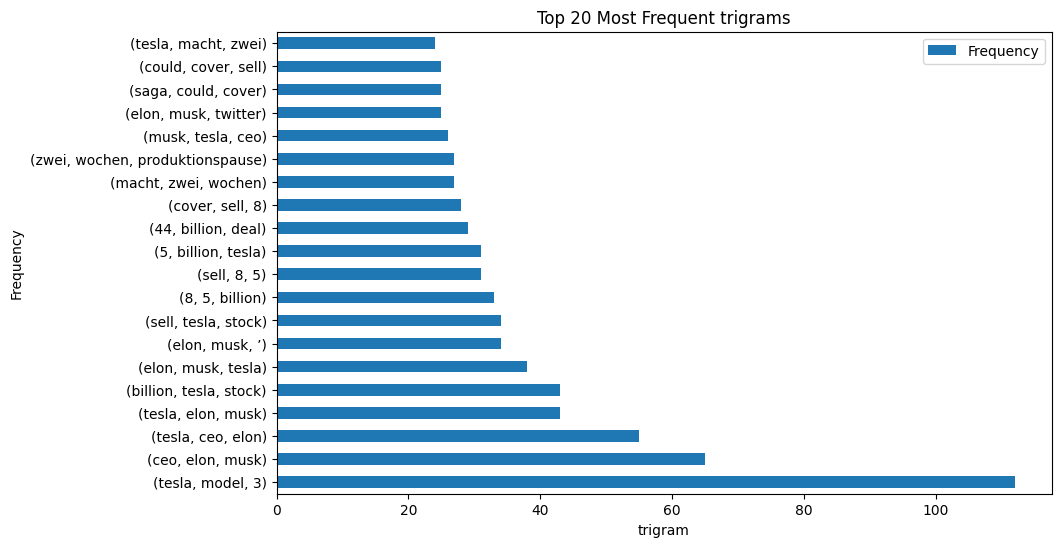

In [ ]:
trigram_df.plot(x='trigram', y='Frequency', kind='barh', figsize=(10, 6))
plt.title(f'Top {top_N} Most Frequent trigrams')
plt.xlabel('trigram')
plt.ylabel('Frequency')
plt.show()

## Sentiment Analysis

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Initialize VADER
sia = SentimentIntensityAnalyzer()

In [ ]:
# Apply sentiment scoring
df['sentiment_score'] = df['clean_tweet'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [ ]:
df['sentiment_label'] = df['sentiment_score'].apply(
    lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral')
)

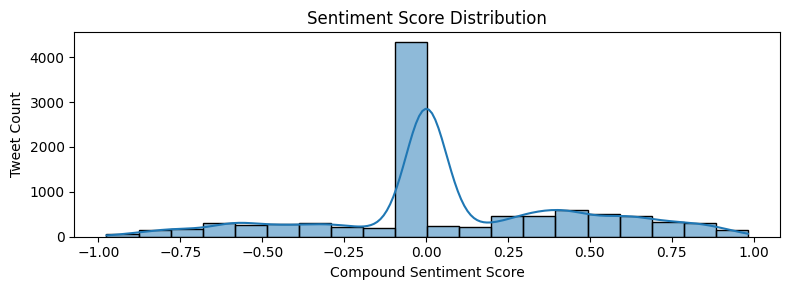

In [ ]:
plt.figure(figsize=(8, 3))
sns.histplot(df['sentiment_score'], bins=20, kde=True)
plt.title('Sentiment Score Distribution')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Tweet Count')
plt.tight_layout()
plt.show()

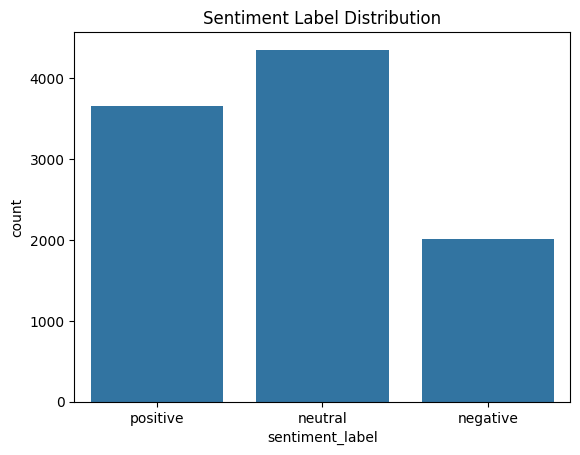

In [ ]:
sns.countplot(data=df, x='sentiment_label', order=['positive', 'neutral', 'negative'])
plt.title('Sentiment Label Distribution')
plt.show()

## Top 10 Rare Words

In [ ]:
# Combine all cleaned tweets into one string
all_words = ' '.join(df['clean_tweet']).split()

# Count word frequencies
word_freq = Counter(all_words)


In [ ]:
# Get 10 rarest words (frequency = lowest)
rare_words = word_freq.most_common()[::-1][:10]


In [ ]:
# Create DataFrame
rare_df = pd.DataFrame(rare_words, columns=['Word', 'Frequency'])

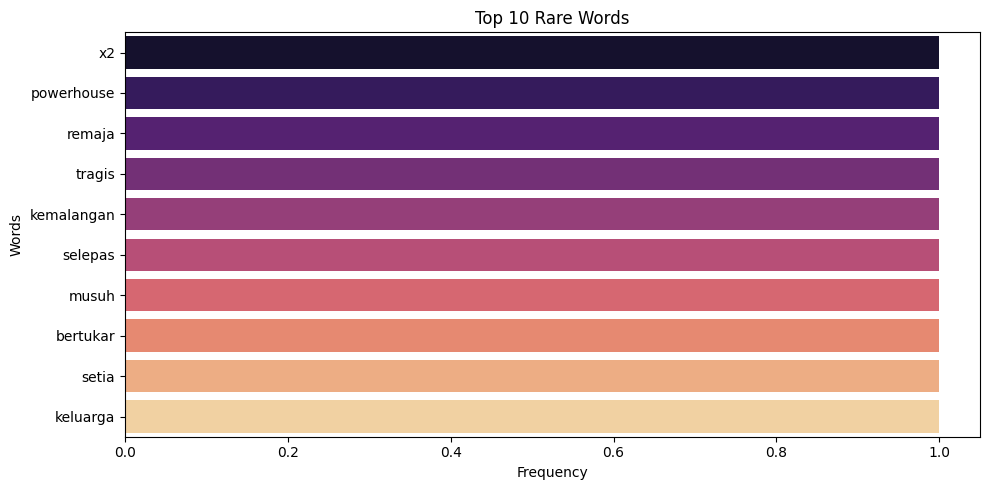

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=rare_df, x='Frequency', y='Word', palette='magma')
plt.title('Top 10 Rare Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.tight_layout()
plt.show()

# Count vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')


In [ ]:
# Fit and transform the clean tweets
count_matrix = count_vectorizer.fit_transform(df['clean_tweet'])

In [ ]:
# Get feature names (words)
feature_names = count_vectorizer.get_feature_names_out()
feature_names

array(['00', '000', '00000001', ..., 'เง', 'แต', '๑o'], dtype=object)

In [ ]:
# Extract top 5 keywords by count for each tweet
top_keywords_count = []
for i in range(len(df)):
    feature_index = count_matrix[i, :].nonzero()[1]
    count_scores = zip(feature_index, [count_matrix[i, x] for x in feature_index])
    top_keywords_count.append(
        sorted([(feature_names[i], int(s)) for (i, s) in count_scores], key=lambda x: x[1], reverse=True)[:5]
    )


In [ ]:
df['top_keywords_count'] = top_keywords_count
df[['clean_tweet', 'top_keywords_count']].head(10)


,clean_tweet,top_keywords_count
0,six 4 still live home homeschooled taught self...,"[(education, 2), (live, 1), (home, 1), (taught..."
1,go dozen kids… missing 3 go,"[(dozen, 1), (kids, 1), (missing, 1)]"
2,think buying country mexico could turn richest...,"[(country, 2), (mexico, 2), (think, 1), (buyin..."
3,innocuous actual receipt yet ’ asked anyone bu...,"[(actual, 1), (receipt, 1), (asked, 1), (buy, ..."
4,tesla wall battery save power went still run a...,"[(tesla, 1), (100, 1), (wall, 1), (battery, 1)..."
5,sale 2021 used tesla model standard range rear...,"[(tesla, 1), (sale, 1), (2021, 1), (used, 1), ..."
6,think buying country mexico could turn richest...,"[(country, 2), (mexico, 2), (think, 1), (buyin..."
7,tsla full macd cross yet remember buy 700 sell...,"[(700, 2), (buying, 1), (buy, 1), (tesla, 1), ..."
8,far remember leonardo da vinci already wrote s...,"[(love, 3), (leonardo, 2), (child, 2), (rememb..."
9,let ’ real average american going pay 40k 70k ...,"[(tesla, 2), (car, 2), (right, 1), (let, 1), (..."


# Tf-IDF vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')


In [ ]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_tweet'])


In [ ]:
# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_names

array(['00', '000', '00000001', ..., 'เง', 'แต', '๑o'], dtype=object)

In [ ]:
# Get top keywords for each tweet
top_keywords = []
for i in range(len(df)):
    feature_index = tfidf_matrix[i,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf_matrix[i, x] for x in feature_index])
    top_keywords.append(sorted([(feature_names[i], s) for (i, s) in tfidf_scores], key=lambda x: x[1], reverse=True)[:5])


In [ ]:
# Display top keywords
df['top_keywords'] = top_keywords
df[['clean_tweet', 'top_keywords']].head(5)

,clean_tweet,top_keywords
0,six 4 still live home homeschooled taught self...,"[(education, 0.5270806445246703), (taught, 0.2..."
1,go dozen kids… missing 3 go,"[(kids, 0.6284890186460601), (dozen, 0.5806875..."
2,think buying country mexico could turn richest...,"[(mexico, 0.4976142122452972), (country, 0.403..."
3,innocuous actual receipt yet ’ asked anyone bu...,"[(receipt, 0.35328251237172376), (grifter, 0.3..."
4,tesla wall battery save power went still run a...,"[(wall, 0.4101832580652704), (ac, 0.3815651696..."


# Topic Modelling

* 1️⃣ max_df=0.95- Removes very frequent words that appear in more than 95% of the documents.
* 2️⃣ min_df=2- Removes rare words that appear in less than 2 documents.
* 3️⃣ stop_words='english'- Removes common English stopwords like "the", "is", "and", "in", etc.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Tokenize and vectorize the text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['clean_tweet'])

In [ ]:
lda_model = LatentDirichletAllocation(n_components=5, random_state=42) # Topic modelling
lda_output = lda_model.fit_transform(X)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [ ]:
# Display the topics
print("Topics found via LDA:")
no_top_words = 10
display_topics(lda_model, vectorizer.get_feature_names_out(), no_top_words)


Topics found via LDA:
Topic 1:
tesla la que en el da musk se und die
Topic 2:
tesla adri je na speed da people nie child country
Topic 3:
tesla car like model ev make people think electric year
Topic 4:
tesla le la et die en grünheide future est pour
Topic 5:
tesla twitter elon musk stock buy deal billion tsla share


# Word2Vec (Skip gram and CBOW)

In [ ]:
!pip install --upgrade numpy gensim --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

In [ ]:
# Convert clean tweets to tokenized format
tokenized_tweets = df['clean_tweet'].apply(word_tokenize).tolist()

In [ ]:
# Build the Word2Vec model (Skip Gram)
w2v_model = Word2Vec(sentences=tokenized_tweets, vector_size=100, window=5, min_count=2, workers=4, sg=1)  # sg=1 for Skip-Gram, sg=0 for CBOW


In [ ]:
# Vector representation of a word
print(w2v_model.wv['happy'])

[-0.0342725   0.06313341  0.08782174 -0.01335053 -0.3472246  -0.34312728
  0.20056811  0.2305243  -0.1674403  -0.25796893 -0.06853577 -0.01926937
 -0.10761322  0.0030568   0.04644582  0.2246742   0.09233118 -0.21523899
 -0.12535308 -0.36513495  0.17812228  0.25301954  0.22857687 -0.09264716
 -0.08596052  0.11807523 -0.24888529 -0.12569557  0.13013464 -0.02892194
  0.15390281 -0.07952109  0.39332306 -0.36454293 -0.01121786  0.22022043
  0.31681064 -0.45842978 -0.26980278 -0.4235523   0.01342201 -0.23683052
  0.46156287  0.19266023 -0.02204991 -0.1683595   0.00405212 -0.2331127
 -0.17357916  0.07649068 -0.17026123 -0.06581931 -0.3046917  -0.4021212
  0.01264778  0.07459789  0.46485165 -0.13068071  0.02467373  0.42011586
  0.11704041  0.12007362 -0.07018813  0.22105555 -0.26123592  0.20695844
  0.00182237 -0.04651193 -0.14978836  0.56317115 -0.17277448  0.17447595
 -0.00231945  0.01030346  0.37503365 -0.11843155 -0.07583085 -0.20098893
 -0.07069139 -0.11164652  0.2865272   0.14897385 -0.1

In [ ]:
# Most similar words to 'love'
print(w2v_model.wv.most_similar('love'))

[('pretty', 0.9957872629165649), ('must', 0.9955798983573914), ('cool', 0.9943864345550537), ('rich', 0.9941799640655518), ('understand', 0.9940810799598694), ('bad', 0.9939278960227966), ('though', 0.993916392326355), ('find', 0.9938798546791077), ('believe', 0.9938143491744995), ('mind', 0.9936452507972717)]


In [ ]:
#CBOW
w2v_model = Word2Vec(sentences=tokenized_tweets, vector_size=100, window=5, min_count=2, workers=4, sg=0)  # sg=1 for Skip-Gram, sg=0 for CBOW

In [ ]:
# Vector representation of a word
print(w2v_model.wv['happy'])

[-1.63076460e-01  4.93512779e-01  1.46898955e-01  1.47289500e-01
 -6.92486297e-03 -6.29581809e-01  1.31688446e-01  7.98547506e-01
 -4.93071318e-01 -4.31481838e-01 -2.73171842e-01 -4.67173427e-01
 -1.96643874e-01  1.48774371e-01  7.38214925e-02  7.80306980e-02
  3.37695405e-02 -4.54543263e-01  6.14144318e-02 -9.44568753e-01
  3.13014716e-01  2.90609092e-01  5.00944555e-01 -2.24392414e-01
 -8.44790563e-02 -6.25733882e-02 -4.54645038e-01 -1.14528917e-01
 -1.86669022e-01  5.84120713e-02  4.88582790e-01 -6.57143886e-04
  3.12055469e-01 -2.99072057e-01 -1.92613482e-01  3.99771065e-01
  3.88839573e-01 -4.38741654e-01 -4.63426381e-01 -5.04529536e-01
 -2.66730804e-02 -2.91999906e-01 -9.03991684e-02  2.06549689e-01
  2.04487622e-01  1.72505435e-02 -2.63681293e-01 -4.17318121e-02
  1.20119415e-01  2.70276546e-01 -6.58500716e-02 -2.73886956e-02
 -1.34553373e-01 -1.07847169e-01 -8.19029734e-02  6.07247325e-03
  3.89132768e-01 -2.01874048e-01 -2.59651840e-01  2.59586215e-01
  3.63180712e-02  4.49316

In [ ]:
# Most similar words to 'love'
print(w2v_model.wv.most_similar('love'))

[('keep', 0.9997783899307251), ('great', 0.9997521042823792), ('getting', 0.9996972680091858), ('come', 0.9996909499168396), ('everyone', 0.9996781349182129), ('far', 0.999677836894989), ('ever', 0.999676525592804), ('enough', 0.9996693134307861), ('life', 0.9996612071990967), ('free', 0.9996588826179504)]
